In [16]:
import random
import numpy as np
import pandas as pd
from function.valuate import *
from function.normalize import *
from function.crossover import *

In [17]:
def normalize_theta(theta):
    return theta / np.sum(theta)

In [18]:
def transform_x52(value):
    return -value

In [19]:

def fitness(theta):
    normalized_theta = normalize_theta(theta)
    accuracy = valuate_f1_score(normalized_theta)
    return accuracy
    

In [20]:
def generate_initial_solutions(num_solutions, num_params):
    solutions = []
    for _ in range(num_solutions):
        solution = np.random.rand(num_params)
        solutions.append(tuple(solution))
    return solutions


def mutate(child, mutation_rate):  # Ham dot bien
    mutated_child = tuple([gene * random.uniform(1 - mutation_rate, 1 + mutation_rate) for gene in child])
    return mutated_child

In [21]:
# Số lượng tham số
num_params = 16

# Số lượng giải pháp và thế hệ
num_solutions = 1000
num_generations = 100

# Tạo thế hệ ban đầu
solutions = generate_initial_solutions(num_solutions, num_params)
solutions.append(tuple([3.29901864e-01, 2.77396048e-01, 3.42950455e-04, 6.30279929e-04,
       2.82648249e-04, 5.83134623e-04, 5.22615769e-03, 8.12412344e-03,
       3.94367592e-03, 2.02455469e-01, 9.16680842e-02, 6.46572894e-04,
       6.56377256e-04, 4.83840117e-03, 8.88733040e-03, 6.44168838e-02]))


In [22]:
for generation_id in range(num_generations):
    # print(generation_id)
    rankedsolutions = [(fitness(s), s) for s in solutions]
    rankedsolutions = sorted(rankedsolutions, key=lambda x: x[0], reverse=True)

    # print(f"=== Gen {generation_id} best solutions ===")
    # print(rankedsolutions[0][0])  # Tìm giải pháp tốt nhất

    if rankedsolutions[0][0] >=0.8:
        break

    bestSolutions = rankedsolutions[:90] + rankedsolutions[-10:]

    elements = np.concatenate([np.array(s[1]) for s in bestSolutions])
    newGen = []

    for _ in range(len(solutions)):
        # Crossover
        parent1, parent2 = random.choice(bestSolutions)[1], random.choice(bestSolutions)[1]
        child = two_point_crossover(parent1, parent2)

        # Mutation
        mutated_child = mutate(child, mutation_rate=0.01)

        # Chuẩn hóa tổng của mutated_child để bằng 1
        normalized_mutated_child = normalize_theta(mutated_child)

        newGen.append(normalized_mutated_child)

    solutions = newGen

In [23]:
# print(valuate(solutions[0]))

In [24]:
solutions[0]

array([3.32018210e-01, 2.79254018e-01, 2.27433723e-04, 3.06408387e-04,
       1.54354219e-04, 3.62546549e-04, 5.89799465e-03, 8.07119661e-03,
       3.84820684e-03, 2.14685650e-01, 7.06922775e-02, 3.66388453e-04,
       4.61967056e-04, 4.73281786e-03, 3.46654362e-03, 7.54539865e-02])

In [25]:
from function.normalize import normalize_theta

In [26]:
a, b = normalize_theta(solutions[0])

In [27]:
a

array([0.61127223, 0.00105074, 0.01396919, 0.28922613, 0.00082836,
       0.00473282, 0.07892053])

In [28]:
b

[array([0.54315932, 0.45684068]),
 array([0.21645041, 0.2916112 , 0.14690009, 0.34503831]),
 array([0.42221447, 0.57778553]),
 array([0.01330518, 0.74227611, 0.24441871]),
 array([ 0.44230822, -0.55769178]),
 array([1.]),
 array([0.04392448, 0.95607552])]

In [29]:
np.array(accuracy_all(solutions[0])).mean()

0.7944419938244376

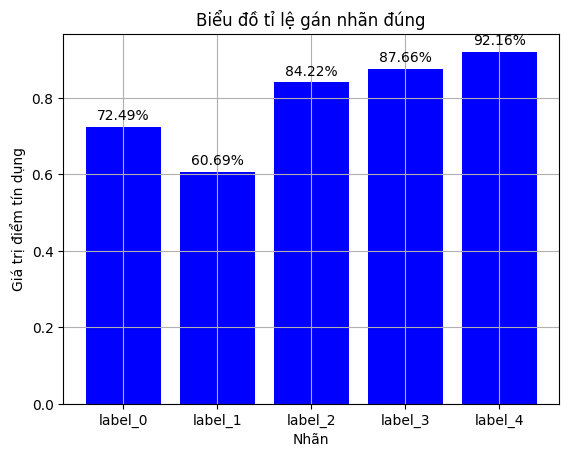

In [30]:
import matplotlib.pyplot as plt

label_name = ['label_0','label_1', 'label_2','label_3', 'label_4']
accuracy_list = accuracy_all(solutions[0])
indices = list(range(1, len(accuracy_list) + 1))

# Vẽ biểu đồ cột
plt.bar(indices, accuracy_list, color='blue')

plt.title('Biểu đồ tỉ lệ gán nhãn đúng')
plt.xlabel('Nhãn')
plt.ylabel('Giá trị điểm tín dụng')

for i, v in enumerate(accuracy_list):
    plt.text(i + 1, v + 0.01, f'\n{v*100:.2f}%', ha='center', va='bottom', color='black')

# Đặt nhãn trục x
plt.xticks(indices, label_name)
plt.grid(True)
plt.show()
